In [1]:
%matplotlib inline
%load_ext autoreload

%autoreload 2

In [2]:
import json
import gff3_parsing
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [3]:
'''imports a dictionary and lets us see binding strength of the shine-dalgarno sequences'''
# with open('../Data/examples_for_testing/energyRef_CCUCCU_ensemble.json', 'r') as infile:
#        energy_dict = json.load(infile)
        
with open('../Data/examples_for_testing/energyRef_CCUCCU_mfe.json', 'r') as infile:
       energy_dict = json.load(infile)

In [6]:
#example of how to see binding strength(must use 6nt length)
print(energy_dict["GGAGUA"])
print(energy_dict["AGGAGU"])
print(energy_dict["CAGGAG"])

-0.45
-6.93
-0.51


In [7]:
new_df, new_genome = gff3_parsing.compile_sequences("../Data/examples_for_testing/ecoli.gff3",\
                                                    "../Data/examples_for_testing/ecoli.fasta", 20)

In [9]:
new_df.head(10)

,genome_id,source,type,start,stop,idk,strand,trash,qualifiers,coding_sequence,upstream_sequence
2,NC_000913.3,RefSeq,CDS,190,255,.,+,0,ID=cds-NP_414542.1;Parent=gene-b0001;Dbxref=Un...,ATGAAACGCATTAGCACCACCATTACCACCACCATCACCATTACCA...,TTACAGAGTACACAACATCC
4,NC_000913.3,RefSeq,CDS,337,2799,.,+,0,ID=cds-NP_414543.1;Parent=gene-b0002;Dbxref=Un...,ATGCGAGTGTTGAAGTTCGGCGGTACATCAGTGGCAAATGCAGAAC...,AAGGTAACGAGGTAACAACC
6,NC_000913.3,RefSeq,CDS,2801,3733,.,+,0,ID=cds-NP_414544.1;Parent=gene-b0003;Dbxref=Un...,ATGGTTAAAGTTTATGCCCCGGCTTCCAGTGCCAATATGAGCGTCG...,ATGGAAGTTAGGAGTCTGAC
8,NC_000913.3,RefSeq,CDS,3734,5020,.,+,0,ID=cds-NP_414545.1;Parent=gene-b0004;Dbxref=Un...,ATGAAACTCTACAATCTGAAAGATCACAACGAGCAGGTCAGCTTTG...,CACGAGTACTGGAAAACTAA
10,NC_000913.3,RefSeq,CDS,5234,5530,.,+,0,ID=cds-NP_414546.1;Parent=gene-b0005;Dbxref=Un...,GTGAAAAAGATGCAATCTATCGTACTCGCACTTTCCCTGGTTCTGG...,AATGATAAAAGGAGTAACCT
14,NC_000913.3,RefSeq,CDS,5683,6459,.,-,0,ID=cds-NP_414547.1;Parent=gene-b0006;Dbxref=Un...,ATGCTGATTCTTATTTCACCTGCGAAAACGCTTGATTACCAAAGCC...,ATTTCCTGCAAGGACTGGAT
16,NC_000913.3,RefSeq,CDS,6529,7959,.,-,0,ID=cds-NP_414548.1;Parent=gene-b0007;Dbxref=Un...,ATGCCAGATTTTTTCTCCTTCATTAACAGCGTCCTTTGGGGATCGG...,CGGCAATAAGAGGGATATGC
18,NC_000913.3,RefSeq,CDS,8238,9191,.,+,0,ID=cds-NP_414549.1;Parent=gene-b0008;Dbxref=Un...,ATGACGGACAAATTGACCTCCCTTCGTCAGTACACCACCGTAGTGG...,GTTTAAAGAGAAATACTATC
20,NC_000913.3,RefSeq,CDS,9306,9893,.,+,0,ID=cds-NP_414550.1;Parent=gene-b0009;Dbxref=Un...,ATGAATACTTTACGTATTGGCTTAGTTTCCATCTCTGATCGCGCAT...,GTTTAAACGGAAAAATCTTG
22,NC_000913.3,RefSeq,CDS,9928,10494,.,-,0,ID=cds-NP_414551.1;Parent=gene-b0010;Dbxref=Un...,ATGGGCAACACTAAGTTGGCTAATCCGGCACCGCTGGGCCTGATGG...,ATGATGATTTTTGAGGAATT


In [ ]:
test_string = 'TTACAGAGTACACAACATCC'.replace("T", "U")

In [ ]:
fragment = test_string[7:13]
print(fragment,energy_dict[fragment])

In [5]:
energy_dict["ACACAA"]
energy_dict

-0.01

In [10]:
# for upstream in new_df["upstream_sequence"][:10]:
#     test_string = upstream.replace("T", "U")
#     energy = energy_dict[test_string[9:15]]
    
#     new_df.at[upstream, "energy_binding"] = energy

# new_df.head(10)   

for index in new_df.index:
    upstream = new_df.loc[index,"upstream_sequence"]
    test_string = upstream.replace("T", "U")
    energy = energy_dict[test_string[9:15]]
    
    new_df.at[index, "energy_binding"] = energy

new_df.tail()

,genome_id,source,type,start,stop,idk,strand,trash,qualifiers,coding_sequence,upstream_sequence,energy_binding
10161,NC_000913.3,RefSeq,CDS,4636696,4638120,.,+,0,ID=cds-NP_418816.1;Parent=gene-b4399;Dbxref=Un...,ATGCGTATCGGCATGCGGTTGTTGCTGGGCTATTTTTTACTGGTGG...,TATAGCCTGAGGGGCCTGTA,-5.90
10163,NC_000913.3,RefSeq,CDS,4638178,4639530,.,+,0,ID=cds-NP_418817.1;Parent=gene-b4400;Dbxref=Un...,ATGTTGAAATCCCCCCTGTTCTGGAAAATGACTAGCCTGTTTGGTG...,CCATTGCAAAGGAGAAGACT,-7.23
10165,NC_000913.3,RefSeq,CDS,4639590,4640306,.,-,0,ID=cds-NP_418818.1;Parent=gene-b4401;Dbxref=Un...,ATGCAGACCCCGCACATTCTTATCGTTGAAGACGAGTTGGTAACAC...,TGGCAATTTAGGTAGCAAAC,-3.30
10167,NC_000913.3,RefSeq,CDS,4640402,4640542,.,+,0,ID=cds-NP_418819.1;Parent=gene-b4402;Dbxref=Un...,ATGACTAAAGTACGTAATTGCGTTCTTGATGCACTTTCCATCAACG...,ATTAACATGATCGGCGTAAC,-0.34
10169,NC_000913.3,RefSeq,CDS,4640942,4641628,.,+,0,ID=cds-NP_418820.1;Parent=gene-b4403;Dbxref=Un...,ATGCGTATAACGATTATTCTGGTCGCACCCGCCAGAGCAGAAAATA...,TGATCAAGAAGAGTGGCAAT,-0.55


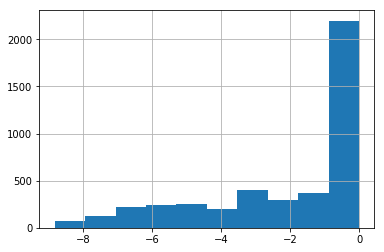

In [11]:
new_df["energy_binding"].hist()

(array([  70.,  130.,  218.,  246.,  248.,  203.,  400.,  297.,  370.,
        2197.]),
 array([-8.83 , -7.947, -7.064, -6.181, -5.298, -4.415, -3.532, -2.649,
        -1.766, -0.883, -0.   ]),
 <a list of 10 Patch objects>)

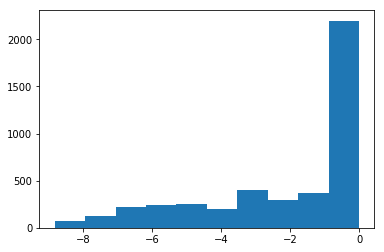

In [12]:
fig, ax = plt.subplots()
ax.hist(new_df["energy_binding"])

In [ ]:
test_string = 'TTACAGAGTACACAACATCC'



In [13]:
for index in new_df.index:
    upstream = new_df.loc[index,"upstream_sequence"]
    test_string = upstream.replace("T", "U")
    energy_4gap = energy_dict[test_string[10:16]]
    energy_5gap = energy_dict[test_string[9:15]]
    energy_6gap = energy_dict[test_string[8:14]]
    energy_7gap = energy_dict[test_string[7:13]]
    
    #print(min(energy_4gap,energy_5gap,energy_6gap,energy_7gap))
    new_df.at[index, "energy_binding"] = min(energy_4gap,energy_5gap,energy_6gap,energy_7gap)
    

In [ ]:
new_df.head(10)

(array([266., 384., 653., 740., 509., 489., 405., 255., 376., 302.]),
 array([-8.83 , -7.948, -7.066, -6.184, -5.302, -4.42 , -3.538, -2.656,
        -1.774, -0.892, -0.01 ]),
 <a list of 10 Patch objects>)

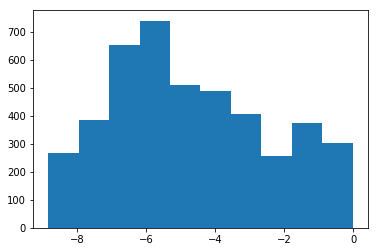

In [14]:
fig, ax = plt.subplots()
ax.hist(new_df["energy_binding"])

In [ ]:
list(range(4,7))

In [ ]:
gaps = (4,7)
for index in new_df.index:
    upstream = new_df.loc[index,"upstream_sequence"]
    test_string = upstream.replace("T", "U")
    energy_list = []
    for gap in range(gaps[0],gaps[1]+1):
         energy_list.append(energy_dict[test_string[-gap - 6: -gap]])
    
    #print(min(energy_4gap,energy_5gap,energy_6gap,energy_7gap))
    new_df.at[index, "energy_binding"] = min(energy_list)
new_df.tail()

In [ ]:
gap = 4
test_string = "TTACAGAGTACACAACATCC"

print(test_string[10:16], test_string[-gap - 6:-gap])

# Compiled useful stuff into recreatable function

In [8]:
def analyze_genome(dataframe, energy_dict, gaps = (4,8)):
    
    for index in dataframe.index:
        upstream = dataframe.loc[index,"upstream_sequence"]
        test_string = upstream.replace("T", "U")
        energy_list = []
        for gap in range(gaps[0],gaps[1]+1):
             energy_list.append(energy_dict[test_string[-gap - 6: -gap]])

        dataframe.at[index, "energy_binding"] = min(energy_list)
    return dataframe


In [9]:
with open('../Data/examples_for_testing/energyRef_CCUCCU_mfe.json', 'r') as infile:
       energy_dict = json.load(infile)


host_df, host_genome = gff3_parsing.compile_sequences("../Data/examples_for_testing/ecoli.gff3",\
                                                    "../Data/examples_for_testing/ecoli.fasta", 20)

viral_df, viral_genome = gff3_parsing.compile_sequences("../Data/examples_for_testing/example_virus_PRODIGAL.gff3",\
                                                    "../Data/examples_for_testing/example_virus.fasta", 20)

In [11]:
host_df = analyze_genome(host_df, energy_dict)
viral_df = analyze_genome(viral_df, energy_dict)

(array([0.15891282, 0.15343306, 0.14795331, 0.21371034, 0.10959505,
        0.09863554, 0.1150748 , 0.06575703, 0.06575703, 0.02191901]),
 array([-8.83 , -7.961, -7.092, -6.223, -5.354, -4.485, -3.616, -2.747,
        -1.878, -1.009, -0.14 ]),
 <a list of 10 Patch objects>)

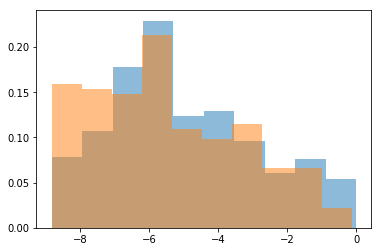

In [16]:
fig, ax = plt.subplots()
ax.hist(host_df["energy_binding"],10, density = True, alpha = 0.5)
ax.hist(viral_df["energy_binding"],10,density= True, alpha = 0.5)

In [33]:
print(np.mean(host_df["energy_binding"]), np.mean(viral_df["energy_binding"]))

print(np.median(host_df["energy_binding"]), np.median(viral_df["energy_binding"]))

-4.669607216259407 -5.203190476190477
-4.59 -5.505000000000001


In [12]:
from scipy import stats

In [15]:
stats.ttest_ind(host_df["energy_binding"], viral_df["energy_binding"])

stats.ranksums(host_df["energy_binding"], viral_df["energy_binding"])

RanksumsResult(statistic=3.561911515447183, pvalue=0.0003681644766643469)

In [11]:
type(viral_df["genome_id"][0])

str

In [12]:
viral_df.to_csv("virus_dataframe.tsv", sep = "\t")

In [10]:
host_df.to_csv("host_dataframe.tsv", sep = "\t")

In [21]:
viral_df.head(20)

,genome_id,source,type,start,stop,idk,strand,trash,qualifiers,coding_sequence,upstream_sequence,energy_binding
0,183,Prodigal_v2.6.3,CDS,3,524,71.9,-,0,ID=1_1;partial=10;start_type=ATG;rbs_motif=AGG...,ATGATGTCTTTTGAAATCAAAGAATGGTTTAATGCGAAAGAGCTGG...,TGAAATCGCTAGGATTTTAA,-4.41
1,183,Prodigal_v2.6.3,CDS,710,931,6.0,+,0,ID=1_2;partial=00;start_type=ATG;rbs_motif=AGG...,ATGCATATGAATAAAAGAACTAACCGCCAAGATTGGCACAGAGCTG...,ATCTGAAAGGATTACATGAA,-4.41
2,183,Prodigal_v2.6.3,CDS,939,2927,251.9,+,0,ID=1_3;partial=00;start_type=ATG;rbs_motif=GGA...,ATGAAAGAATGGTATACAGCAAAAGAGTTGCTCGGTTTGGCAGGTT...,GTCTCGATACTAGGTGCGCT,-2.60
3,183,Prodigal_v2.6.3,CDS,2966,3925,143.0,+,0,ID=1_4;partial=00;start_type=ATG;rbs_motif=GGA...,ATGAATATTTCCGATATTCGCGCAGGACTGCGCACGCTTGTAGACA...,TTAATTACGAGGTTATTTAG,-2.83
4,183,Prodigal_v2.6.3,CDS,3922,4149,18.4,+,0,ID=1_5;partial=00;start_type=ATG;rbs_motif=GGA...,ATGATGTCACGGAATATCAAAATGGCAACGGAAGTAAAGAGCTGGT...,GTGCAAGGGGATGCTGAATC,-5.53
5,183,Prodigal_v2.6.3,CDS,4182,4451,53.6,+,0,ID=1_6;partial=00;start_type=ATG;rbs_motif=GGA...,ATGGCAAAAGTAATCTTTGAATTTAACCGCATGGAAGATGTTGAGT...,TATTTGTGAGGAATAACAAA,-4.48
6,183,Prodigal_v2.6.3,CDS,4472,4891,59.0,+,0,ID=1_7;partial=00;start_type=ATG;rbs_motif=AGG...,ATGAAAGCCAAAATCAGAAACGAAATTCAGGCATTAATTCGGATTA...,TTCGCAAAGGAACGCTGACA,-4.48
7,183,Prodigal_v2.6.3,CDS,4908,5195,37.8,+,0,ID=1_8;partial=00;start_type=ATG;rbs_motif=GGA...,ATGATAATCCCTCGCAAAAGATGGTCACGTGAAGACCGGGAATTTA...,CTGATAAGGAGGGCATCATC,-4.36
8,183,Prodigal_v2.6.3,CDS,5216,5740,95.7,+,0,ID=1_9;partial=00;start_type=ATG;rbs_motif=AGG...,ATGGCTAAACCAGCAAAACGAATCAGGAATGCCGCAGCAGCTTATG...,TTAACAGGAGCTTTATTTAT,-0.22
9,183,Prodigal_v2.6.3,CDS,5839,6381,50.2,+,0,ID=1_10;partial=00;start_type=ATG;rbs_motif=GG...,ATGATTAATACAAAAGTTCTGAGCGGCGTCAGCACATTATTACAGG...,TGATATACGGGATATAAAAA,-4.54


(array([27., 24., 25., 35., 21., 17., 24., 14., 14.,  9.]),
 array([-8.83 , -7.961, -7.092, -6.223, -5.354, -4.485, -3.616, -2.747,
        -1.878, -1.009, -0.14 ]),
 <a list of 10 Patch objects>)

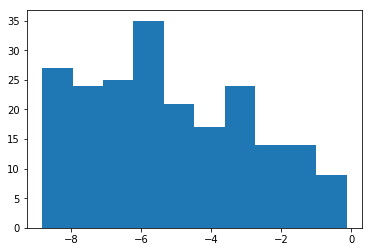